# Лабораторная работа 3. Итеративные и рекурсивные алгоритмы

## Вариант 8

### Задание

- Реализуйте рекурсивный алгоритм подсчета $Q_{MN}$ - числа способов, с помощью которых можно представить целое число $М$ в виде суммы, каждое слагаемое которой не превосходит $N$. Воспользуйтесь следующим определением
$$ Q_{M,N} =  
\left\{
  \begin{array}{ll}
    1, & \text{если} M = 1, \text{при всех} N,\\
    1, & \text{если} N = 1, \text{при всех} M,\\
    Q_{M,M}, & \text{M < N}, \\
    1 + Q_{M,M-1}, & \text{M = N}, \\
     Q_{M,N-1} + Q_{M-N,N}, & \text{M > N}, \\
  \end{array}
\right.$$

- Реализовать алгоритм не используя рекурсию.

- Для каждого реализованного алгоритма:
     1. составьте блок-схему;
     2. оцените верхнюю границу размерности задачи, для которой при рекурсивной реализации не происходит переполнение стека вызовов;
     3. модернизируйте рекурсивную реализацию так, чтобы сохранялись промежуточные результаты вызова рекурсии (реализуйте подобный механизм вручную, а также, с помощью декоратора @memoized);
     4. сравните производительность реализованных алгоритмов (количество итераций (соответственно вызовов рекурсии) подбирайте исходя из условий задачи).

### Реализация алгоритма

#### Задание 1

In [11]:
def Q_recursive(m, n):
    if m == 1 or n == 1:
        return 1
    elif m < n:
        return Q_recursive(m, m)
    elif m == n:
        return 1 + Q_recursive(m, m - 1)
    else:
        return Q_recursive(m, n - 1) + Q_recursive(m - n, n)


In [6]:
print(Q_recursive(5,3))
print(Q_recursive(50,10))
print(Q_recursive(100,50))

5
62740
189477547


#### Задание 2

In [7]:
def Q_iterative(m, n):
    Q = [[0 for j in range(n+1)] for i in range(m+1)]
    
    for i in range(1, m+1):
        Q[i][1] = 1
    for j in range(1, n+1):
        Q[1][j] = 1

    for i in range(2, m+1):
        for j in range(2, n+1):
            if i < j:
                Q[i][j] = Q[i][i]
            elif i == j:
                Q[i][j] = 1 + Q[i][j-1]
            else:
                Q[i][j] = Q[i][j-1] + Q[i-j][j]

    return Q[m][n]


In [10]:
print(Q_iterative(5,3))
print(Q_iterative(50,10))
print(Q_recursive(100,50))

5
62740
189477547


#### Задание 3

##### Блок-схема

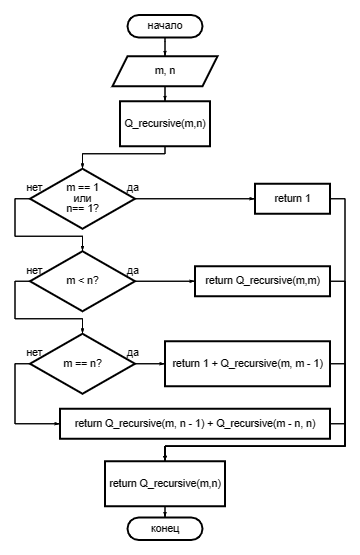

In [49]:
# Рекурсивный алгоритм

from IPython.display import Image
Image(filename = 'img/q_recursive.png')

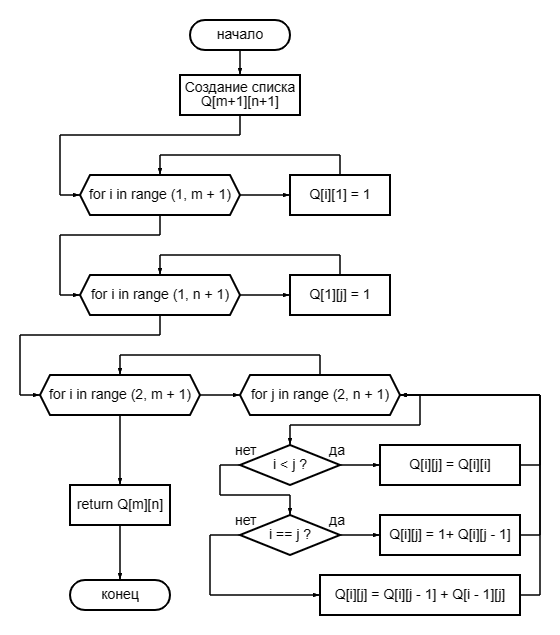

In [52]:
#Не рекурсивный алгоритм

Image(filename = 'img/q_iterative.png')

##### Оценка верхней границы переполнения стека

- Сложность алгоритма $O(mn)$, Таким образом, максимальный размер входных данных, при котором не происходит переполнение стека вызовов, зависит от доступного стека вызовов и количества вызовов, которые алгоритм сделает. Допустим, что максимальная глубина рекурсии, которую может выдержать стек вызовов, равна D. Тогда максимальный размер входных данных, при котором не происходит переполнение стека вызовов, можно оценить как m x n <= D. Следовательно, если мы знаем значение D, мы можем оценить максимальный размер входных данных. Однако, определение точного значения D может быть сложным, так как оно может зависеть от многих факторов, включая доступную оперативную память, конфигурацию компьютера и т.д. В общем случае, стандартный размер стека вызовов составляет несколько мегабайт, что может выдержать глубину рекурсии до нескольких тысяч вызовов. Следовательно, если мы ограничим максимальную глубину рекурсии на уровне нескольких тысяч вызовов, мы можем обрабатывать входные данные, где m и n не превышают нескольких сотен.

#### Реализация сохранения промежуточных результатов вручную

In [53]:
def Q_recursive_manually(m, n, cache={}):
    if m == 1 or n == 1:
        return 1
    elif m < n:
        if (m, m) not in cache:
            cache[(m, m)] = Q_recursive_manually(m, m, cache)
        return cache[(m, m)]
    elif m == n:
        if (m, m-1) not in cache:
            cache[(m, m-1)] = Q_recursive_manually(m, m-1, cache)
        return 1 + cache[(m, m-1)]
    else:
        if (m, n-1) not in cache:
            cache[(m, n-1)] = Q_recursive_manually(m, n-1, cache)
        if (m-n, n) not in cache:
            cache[(m-n, n)] = Q_recursive_manually(m-n, n, cache)
        return cache[(m, n-1)] + cache[(m-n, n)]


In [54]:
print(Q_recursive_manually(5,3))
print(Q_recursive_manually(50,10))
print(Q_recursive_manually(100,50))

5
62740
189477547


#### Реализация сохранения промежуточных результатов при помощи @memoized

In [55]:
def memoized(func):
    cache = {}
    def wrapper(*args):
        if args not in cache:
            cache[args] = func(*args)
        return cache[args]
    return wrapper

@memoized
def Q_memoized(m, n):
    if m == 1 or n == 1:
        return 1
    elif m < n:
        return Q_memoized(m, m)
    elif m == n:
        return 1 + Q_memoized(m, m - 1)
    else:
        return Q_memoized(m, n - 1) + Q_memoized(m - n, n)


In [56]:
print(Q_memoized(5,3))
print(Q_memoized(50,10))
print(Q_memoized(100,50))

5
62740
189477547


#### Оценка производительности

In [59]:
import timeit

m, n = 100, 50

print(f'for m={m} and n={n}:')
print()

print("Q_recursive_manually:")
print(Q_recursive_manually(m, n))
print(timeit.timeit(lambda: Q_recursive_manually(m, n), number=1000))

print('----------------------------------------')

print("Q_memoized:")
print(Q_memoized(m, n))
print(timeit.timeit(lambda: Q_memoized(m, n), number=1000))

print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

m, n = 1000, 200

print(f'for m={m} and n={n}:')
print()

print("Q_recursive_manually:")
print(Q_recursive_manually(m, n))
print(timeit.timeit(lambda: Q_recursive_manually(m, n), number=1000))

print('----------------------------------------')

print("Q_memoized:")
print(Q_memoized(m, n))
print(timeit.timeit(lambda: Q_memoized(m, n), number=1000))

print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

print('Отсюда получается, что функция Q_memoized быстрее чем Q_recursive_manually')

for m=100 and n=50:

Q_recursive_manually:
189477547
0.000421200000346289
----------------------------------------
Q_memoized:
189477547
0.0001733999997668434
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
for m=1000 and n=200:

Q_recursive_manually:
23936196137126761153040765380638
0.00044210000032762764
----------------------------------------
Q_memoized:
23936196137126761153040765380638
0.00018760000057227444
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Отсюда получается, что функция Q_memoized быстрее чем Q_recursive_manually
